# Imports

In [155]:
# Data Wrangling
import pandas as pd 
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn as a standard for visuals :-__-:

# Reducing First column and then continuing with the rest of the columns :-
df = pd.read_csv(r"D:\AI\Credit Risk Modeling\german_credit_data.csv", usecols = ambda column: column != ' ')
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


# Viewing data from statictical POV 

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [157]:
df.describe(include="all").T    # YEahhhhhhhhhhhhhhhh

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk,1000,2,good,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Removing Duplicates

In [158]:
df = df.drop_duplicates()
df.sample(10)  # YEahhhhhhhhhhhhhhhh

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
199,40,male,3,own,little,moderate,4297,18,furniture/equipment,bad
800,54,male,2,free,little,NaN,1597,24,education,good
900,43,male,2,rent,little,little,2625,16,car,bad
781,60,male,2,own,rich,NaN,1940,24,car,good
440,39,male,3,own,little,NaN,1884,12,car,good
314,29,male,1,own,NaN,rich,1494,4,car,good
963,35,male,2,own,quite rich,NaN,2397,24,radio/TV,bad
121,41,female,3,rent,little,NaN,3868,24,car,good
47,23,female,0,rent,quite rich,little,1352,6,car,good
684,31,male,1,own,moderate,moderate,9857,36,business,good


* No Dulicates were found !

# Handle Missing Values Before Encoding

* 1.Showing dimensions of Dataset 

In [159]:
df.shape

(1000, 10)

In [160]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

* 2.Calculating the percentage of missing values in each column

In [161]:
print((df.isnull().sum() / len(df)) * 100)

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64


* Filling NaN values with mode 

In [162]:
# df['Saving accounts'].fillna(df['Saving accounts'].mode()[0],inplace = True)
# df['Checking account'].fillna(df['Checking account'].mode()[0],inplace = True)
# It is causing error , so i did this :-_-_-:
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode()[0])
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode()[0])
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,little,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


# Exploring Categorical Data

In [163]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

df[categorical].head(10)

There are 6 categorical variables

The categorical variables are :

 ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
0,male,own,little,little,radio/TV,good
1,female,own,little,moderate,radio/TV,bad
2,male,own,little,little,education,good
3,male,free,little,little,furniture/equipment,good
4,male,free,little,little,car,bad
5,male,free,little,little,education,good
6,male,own,quite rich,little,furniture/equipment,good
7,male,rent,little,moderate,car,good
8,male,own,rich,little,radio/TV,good
9,male,own,little,moderate,car,bad


In [164]:
for i in df.select_dtypes(include='number').columns: # for columns with specific datatypes 
    print(i)

Age
Job
Credit amount
Duration


* Checking missing values in categorical variables

In [165]:
df[categorical].isnull().sum()

Sex                 0
Housing             0
Saving accounts     0
Checking account    0
Purpose             0
Risk                0
dtype: int64

* Viewing frequency counts of values in categorical variables

In [166]:
for var in categorical: 
    print(f"{df[var].value_counts()} : ",end= "\n\n\n\n")

Sex
male      690
female    310
Name: count, dtype: int64 : 



Housing
own     713
rent    179
free    108
Name: count, dtype: int64 : 



Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64 : 



Checking account
little      668
moderate    269
rich         63
Name: count, dtype: int64 : 



Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64 : 



Risk
good    700
bad     300
Name: count, dtype: int64 : 





* Checking for cardinality in categorical variables

In [167]:
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Sex  contains  2  labels
Housing  contains  3  labels
Saving accounts  contains  4  labels
Checking account  contains  3  labels
Purpose  contains  8  labels
Risk  contains  2  labels


# Checking NUll from Statistical POV (AGAIN)  

In [168]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [169]:
df.describe(include="all").T    # YEahhhhhhhhhhhhhhhh

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,1000,4,little,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,1000,3,little,668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk,1000,2,good,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Descriptive Analysis :

* 1.In Age Minnimum age is 19 years and Maximum age is 75 years which means it is Normally distributed.

* 2.In Duration Min value is 4 months and Maximum value is 72 months so it means no extreme outliers but might need scaling.

# Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the distribution of the data across the varaiables, followed by relationship between the independent and target variable and the correlation among the variables. Through the visualization, I will be able to understand the possible trends and patterns in the data and come to know about the hidden insights of the data.

## Checking names of columns

In [170]:
df.columns #For shwoing column names

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

### We draw Pairplot to check the data distribution so that we can decide Algorithm to train a model.

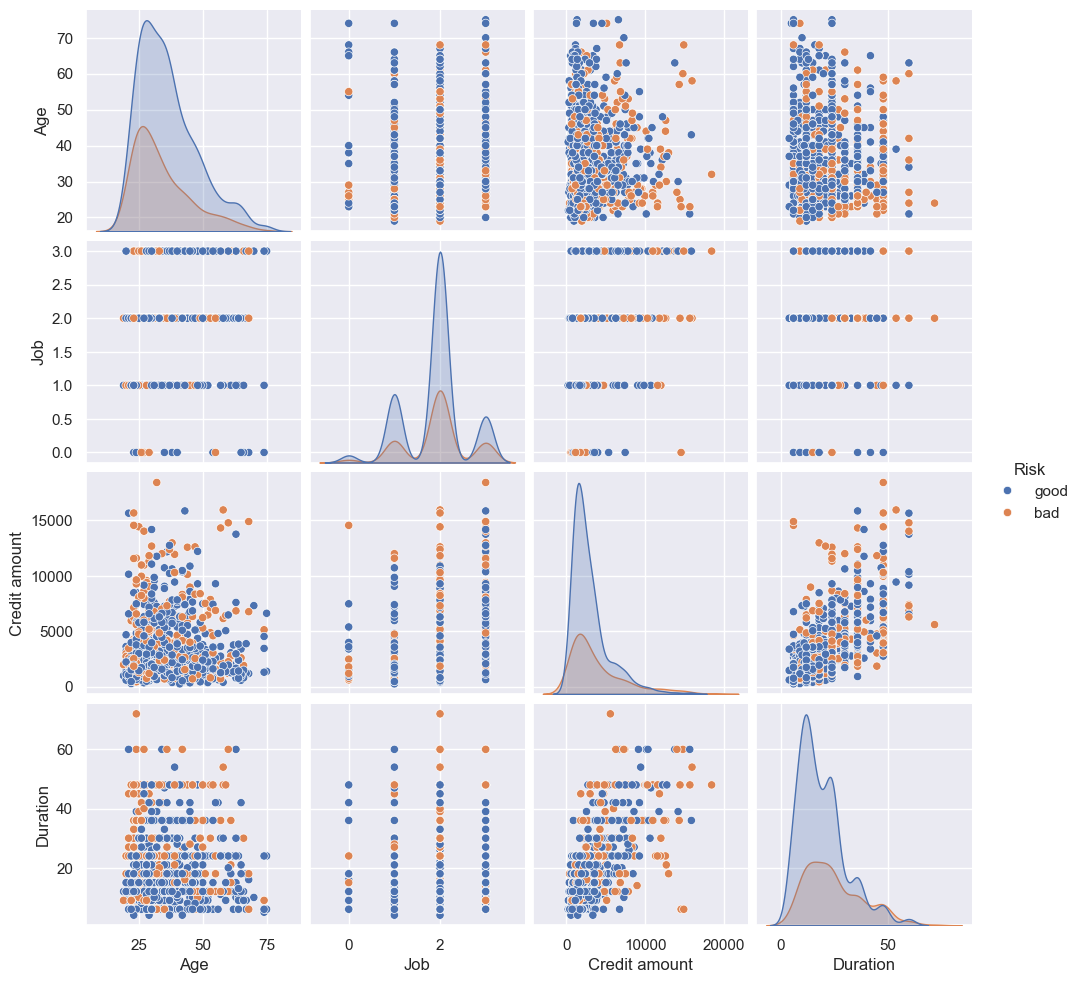

In [171]:
sns.pairplot(data = df, hue ="Risk") 

* By comparing datapoints between each variable, we come to know that it is non-linear classification problem so we use decision tree algorithm for it.

In [172]:
# Create a light green color map
cmap = sns.light_palette("green", as_cmap=True)

# Create a crosstab and apply background gradient for better visualization
styled_table = pd.crosstab(df["Purpose"], df["Sex"]).style.background_gradient(cmap=cmap)

styled_table

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


### Age and Risk 

Text(0.5, 1.0, 'Age vs Risk')

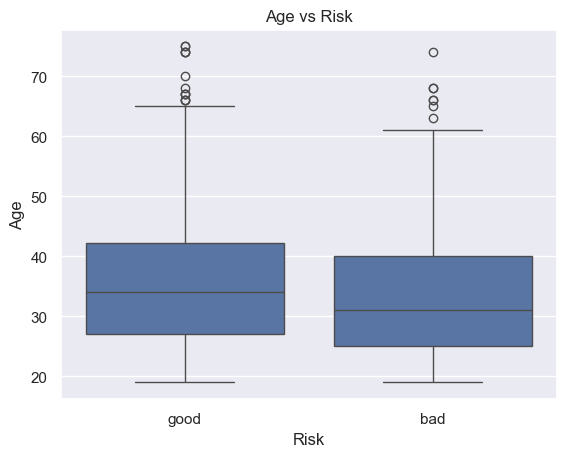

In [173]:
sns.boxplot(x='Risk', y='Age', data=df)
plt.title("Age vs Risk")

The Age is a potential predictor for credit risk:

* Older = safer (probably more financially mature, job stability, better credit history).

* Younger = higher risk (possibly new to credit or unstable income).

### Housing and Risk 

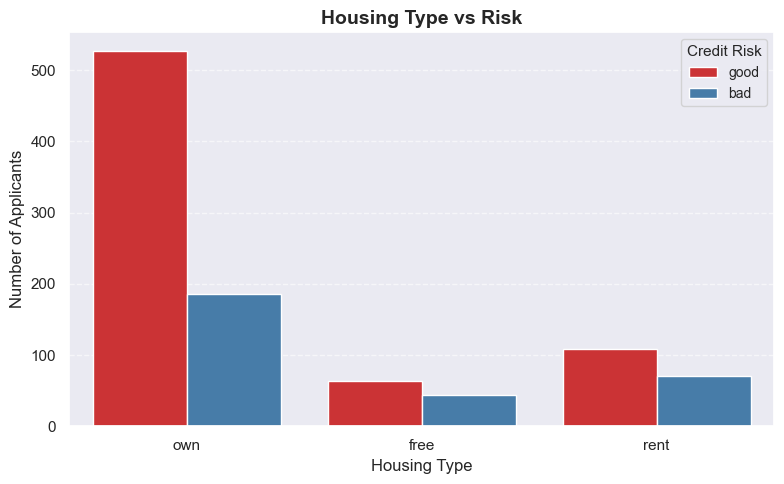

In [174]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Housing', hue='Risk', data=df, palette='Set1')
plt.title('Housing Type vs Risk', fontsize=14, fontweight='bold')
plt.xlabel('Housing Type', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.legend(title='Credit Risk', title_fontsize='11', fontsize='10')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This graph shows that :-
* Owning a house may be a strong indicator of lower credit risk.

* In the "rent" category, the gap between good and bad risk is smaller than in "own" which suggests that renters might have a slightly higher credit risk compared to owners.

* Might need to pay extra attention to applicants who rent or live rent-free when evaluating risk.



### Loan Amount and Risk

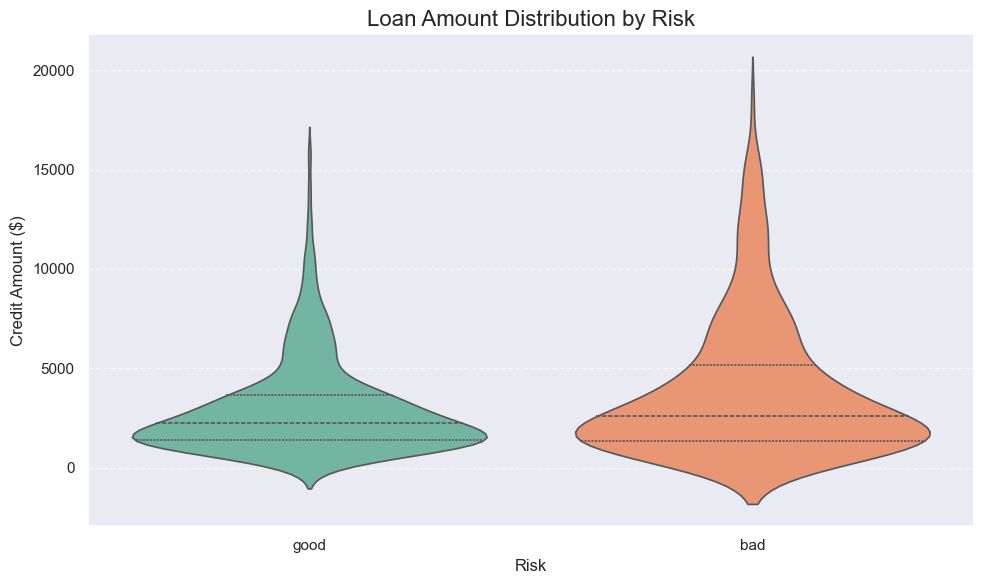

In [175]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Risk',
    y='Credit amount',
    data=df,
    hue='Risk', # Color code each point based on whether the customer is good or bad risk.
    palette='Set2',
    legend=False, # Disabling duplicate legend because it is causing an error -__-
    inner='quartile' )
plt.title("Loan Amount Distribution by Risk", fontsize=16)
plt.xlabel("Risk", fontsize=12)
plt.ylabel("Credit Amount ($)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This graph shows the full distribution of Credit amount for each Risk group:-
* The bad risk group tends to have more people with higher credit amounts.
* The distribution for bad credit is more spread out, especially in higher loan amounts.
* People marked as bad risk tend to take larger loans overall.
* There’s more variance in loan size for bad credit customers.

### Duration and Age 

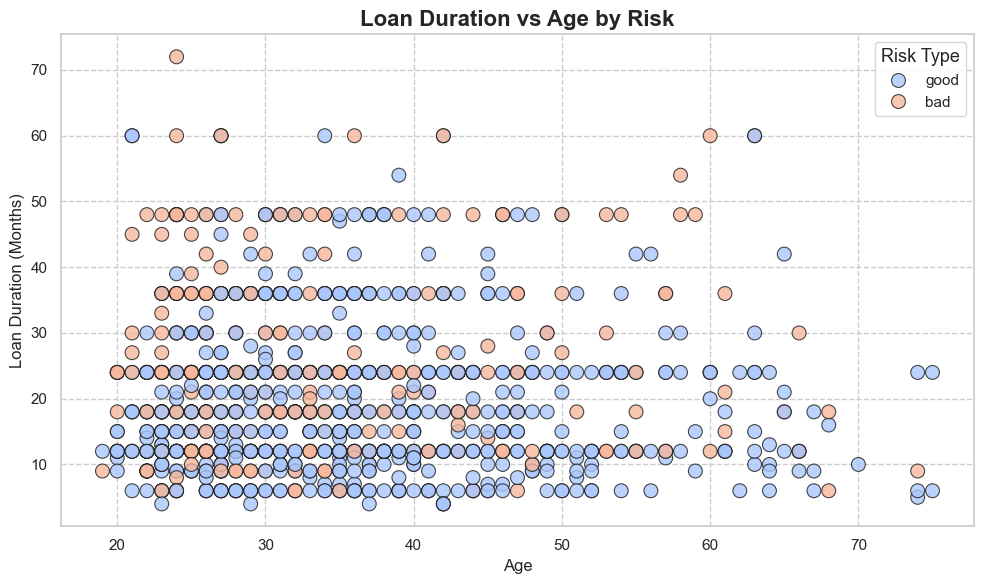

In [176]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Age',
    y='Duration',
    data=df,
    hue='Risk', 
    s=100, # size of dots
    edgecolor='k', # darkening edges 
    palette='coolwarm', # cool cool
    alpha=0.8 # transparency
)

plt.title('Loan Duration vs Age by Risk', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Loan Duration (Months)', fontsize=12)
plt.legend(title='Risk Type', title_fontsize='13', fontsize='11', loc='upper right') # It is the good and right box on upper right ! 
plt.grid(True, linestyle='--') # Showing grid
plt.tight_layout() # Tight layout for cleaner spacing
plt.show()

### Creadit Amount and Duration   

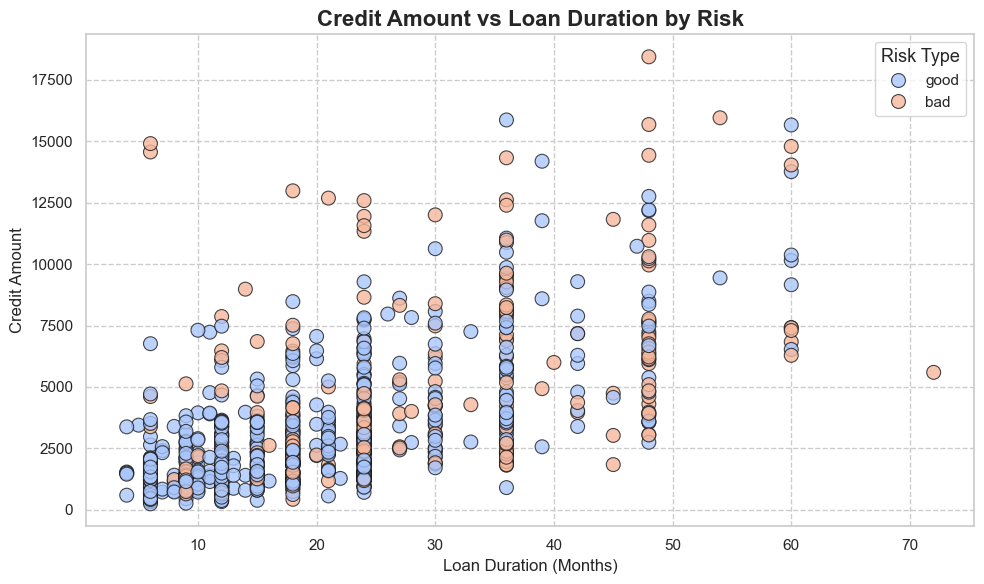

In [177]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Scatter plot 
sns.scatterplot(
    x='Duration',
    y='Credit amount',
    data=df,
    palette='coolwarm',
    hue='Risk',  # colouring 
    s=100,  # size of points
    edgecolor='k',  # black edges of points 
    alpha=0.8  # transparency
)

# Title and labels
plt.title('Credit Amount vs Loan Duration by Risk', fontsize=16, fontweight='bold')
plt.xlabel('Loan Duration (Months)', fontsize=12)
plt.ylabel('Credit Amount', fontsize=12)

# It is the good and right box on upper right ! 
plt.legend(title='Risk Type', title_fontsize='13', fontsize='11', loc='upper right')
# Showing grid
plt.grid(True, linestyle='--')
# Tight layout for cleaner spacing
plt.tight_layout()
# Show plot
plt.show()

# Outliers removal and detection (IQR Method)

In [178]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower threshold
    upper_bound = Q3 + 1.5 * IQR  # Upper threshold
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]  # Return outliers

# Detect outliers
outliers_in_age = detect_outliers_iqr(df, 'Age')
outliers_in_creadit_amount = detect_outliers_iqr(df, 'Credit amount')
outliers_in_Duration = detect_outliers_iqr(df, 'Duration')

print(f"Outliers in Age:\n{outliers_in_age}",end = "\n\n\n")
print(f"Outliers in Creadit_Amount:\n{outliers_in_creadit_amount}",end = "\n\n\n")
print(f"Outliers in Duration:\n{outliers_in_Duration}",end = "\n\n\n")

Outliers in Age:
     Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own          little           little           1169   
75    66    male    3    free          little           little           1526   
137   66    male    1     own      quite rich         moderate            766   
163   70    male    3    free          little         moderate           7308   
179   65    male    2     own          little           little            571   
186   74  female    3    free          little         moderate           5129   
187   68    male    0    free          little         moderate           1175   
213   66    male    3     own          little             rich           1908   
330   75    male    3    free          little           little           6615   
430   74    male    1     own          little           little           3448   
438   65    male    0     own          little           little           3394   
536   75  f

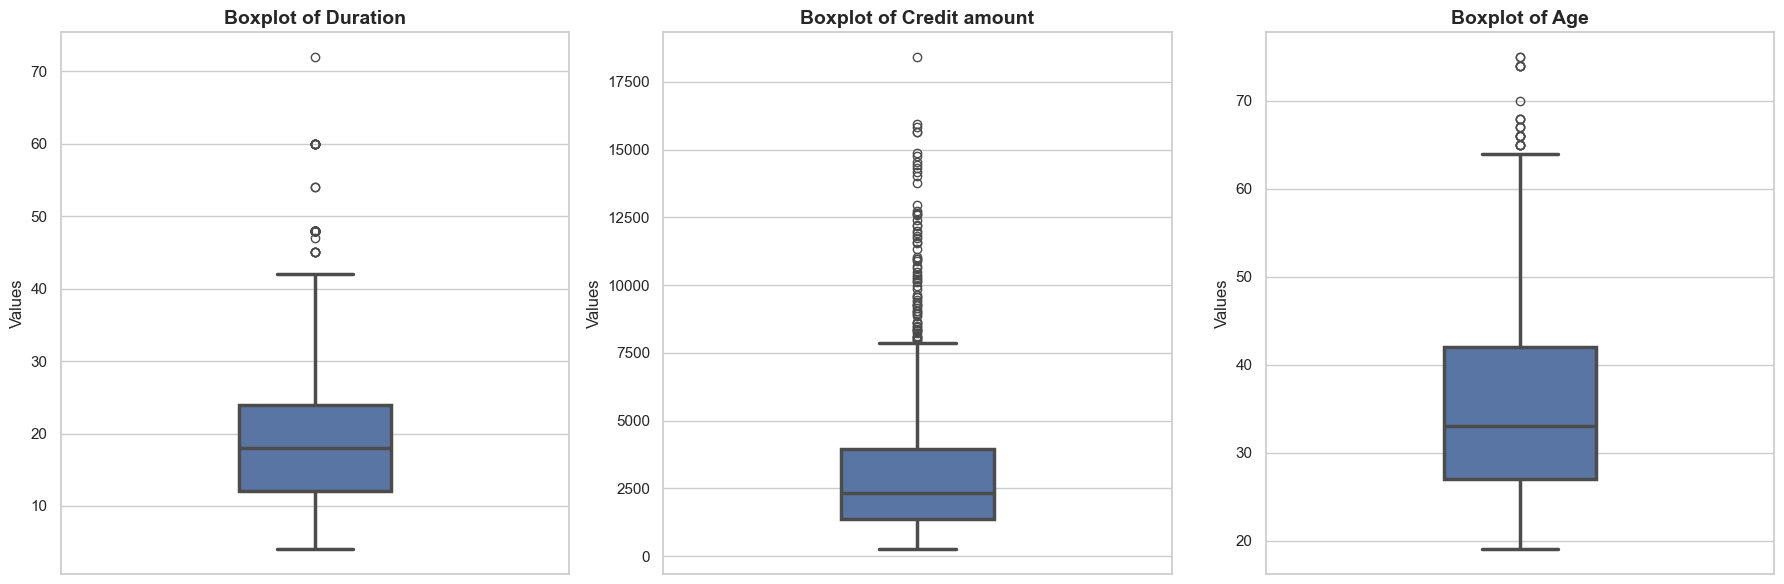

In [179]:
# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Feature list
features = ['Duration', 'Credit amount', 'Age']

# Plot each feature separately
for i, feature in enumerate(features):
    sns.boxplot(data=df[feature], ax=axes[i], width=0.3, linewidth=2.5)
    axes[i].set_title(f'Boxplot of {feature}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

# Encoding (Label Encoding)

In [180]:
# Label Encoding for Binary Columns
from sklearn.preprocessing import LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Male = 1, Female = 0
df['Checking account'] = LabelEncoder().fit_transform(df['Checking account']) # little = 0, moderate = 1, rich = 2
df['Saving accounts'] = LabelEncoder().fit_transform(df['Saving accounts']) # little = 0,moderate = 1,quiterich = 2,rich = 3
df['Housing'] = LabelEncoder().fit_transform(df['Housing']) # Own = 1, rent = 2, free =0 
df['Risk'] = LabelEncoder().fit_transform(df['Risk'])  # Good = 1, Bad = 0

df.head(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,radio/TV,1
1,22,0,2,1,0,1,5951,48,radio/TV,0
2,49,1,1,1,0,0,2096,12,education,1
3,45,1,2,0,0,0,7882,42,furniture/equipment,1
4,53,1,2,0,0,0,4870,24,car,0
5,35,1,1,0,0,0,9055,36,education,1
6,53,1,2,1,2,0,2835,24,furniture/equipment,1
7,35,1,3,2,0,1,6948,36,car,1
8,61,1,1,1,3,0,3059,12,radio/TV,1
9,28,1,3,1,0,1,5234,30,car,0


* Now only purpose column is categorical for it we have to do one-hot encoding

In [181]:
for var in categorical: 
    print(f"{df[var].value_counts()} : ",end= "\n\n")

Sex
1    690
0    310
Name: count, dtype: int64 : 

Housing
1    713
2    179
0    108
Name: count, dtype: int64 : 

Saving accounts
0    786
1    103
2     63
3     48
Name: count, dtype: int64 : 

Checking account
0    668
1    269
2     63
Name: count, dtype: int64 : 

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64 : 

Risk
1    700
0    300
Name: count, dtype: int64 : 



# One Hot Encoding for Multi-Class Categorical Columns (Purpose)

In [182]:
df = pd.get_dummies(df, columns=['Purpose'], drop_first=True)
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1,0,0,1169,6,1,False,False,False,False,True,False,False
1,22,0,2,1,0,1,5951,48,0,False,False,False,False,True,False,False
2,49,1,1,1,0,0,2096,12,1,False,False,True,False,False,False,False
3,45,1,2,0,0,0,7882,42,1,False,False,False,True,False,False,False
4,53,1,2,0,0,0,4870,24,0,True,False,False,False,False,False,False
5,35,1,1,0,0,0,9055,36,1,False,False,True,False,False,False,False
6,53,1,2,1,2,0,2835,24,1,False,False,False,True,False,False,False
7,35,1,3,2,0,1,6948,36,1,True,False,False,False,False,False,False
8,61,1,1,1,3,0,3059,12,1,False,False,False,False,True,False,False
9,28,1,3,1,0,1,5234,30,0,True,False,False,False,False,False,False


In [183]:
print(df.dtypes)  # Check datatypes of all columns

Age                            int64
Sex                            int64
Job                            int64
Housing                        int64
Saving accounts                int64
Checking account               int64
Credit amount                  int64
Duration                       int64
Risk                           int64
Purpose_car                     bool
Purpose_domestic appliances     bool
Purpose_education               bool
Purpose_furniture/equipment     bool
Purpose_radio/TV                bool
Purpose_repairs                 bool
Purpose_vacation/others         bool
dtype: object


In [184]:
print(df.columns) # Printing columns names 

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Risk', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')


* Now converting bool type to int()

In [185]:
# Convert all boolean columns to integers
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
# df.drop(columns = ' ' ,inplace=True)
# Check again
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1,0,0,1169,6,1,0,0,0,0,1,0,0
1,22,0,2,1,0,1,5951,48,0,0,0,0,0,1,0,0
2,49,1,1,1,0,0,2096,12,1,0,0,1,0,0,0,0
3,45,1,2,0,0,0,7882,42,1,0,0,0,1,0,0,0
4,53,1,2,0,0,0,4870,24,0,1,0,0,0,0,0,0
5,35,1,1,0,0,0,9055,36,1,0,0,1,0,0,0,0
6,53,1,2,1,2,0,2835,24,1,0,0,0,1,0,0,0
7,35,1,3,2,0,1,6948,36,1,1,0,0,0,0,0,0
8,61,1,1,1,3,0,3059,12,1,0,0,0,0,1,0,0
9,28,1,3,1,0,1,5234,30,0,1,0,0,0,0,0,0


# Model Building Here is a trick do train test split first then scaling

### Spliting Features and Target

In [186]:
X = df.drop(columns=['Risk'])  # Feature columns
y = df['Risk']  # Target column

### Train Test Split

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  

In [188]:
X_train.shape

(750, 15)

In [189]:
X_train.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

# Scaling Numerical Features 

* Using Robust sacler because data set have a nummber of outliers too in it :(

In [190]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train[['Age', 'Credit amount', 'Duration']] = scaler.fit_transform(X_train[['Age', 'Credit amount', 'Duration']])
X_test[['Age', 'Credit amount', 'Duration']] = scaler.transform(X_test[['Age', 'Credit amount', 'Duration']])

### Exporting DataSet

In [191]:
df.to_csv("Bank_data_transformed.csv")

# Decision Tree Classifier (It is Post pruning by default becuase it is splitting until we don't get a leaf node)

In [192]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=42) # Creating a decision tree object

* Training Model by using training dataset

In [193]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

* Training Accuracy

In [194]:
tree.score(X_train,y_train)

1.0

* Predictions (Testing on test dataset)

In [195]:
y_pred = tree.predict(X_test) 

In [196]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0])

# Model Evaluation

In [197]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [198]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.616

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.36      0.35        72
           1       0.74      0.72      0.73       178

    accuracy                           0.62       250
   macro avg       0.54      0.54      0.54       250
weighted avg       0.62      0.62      0.62       250

Confusion Matrix:
 [[ 26  46]
 [ 50 128]]


### Visualizing the Tree

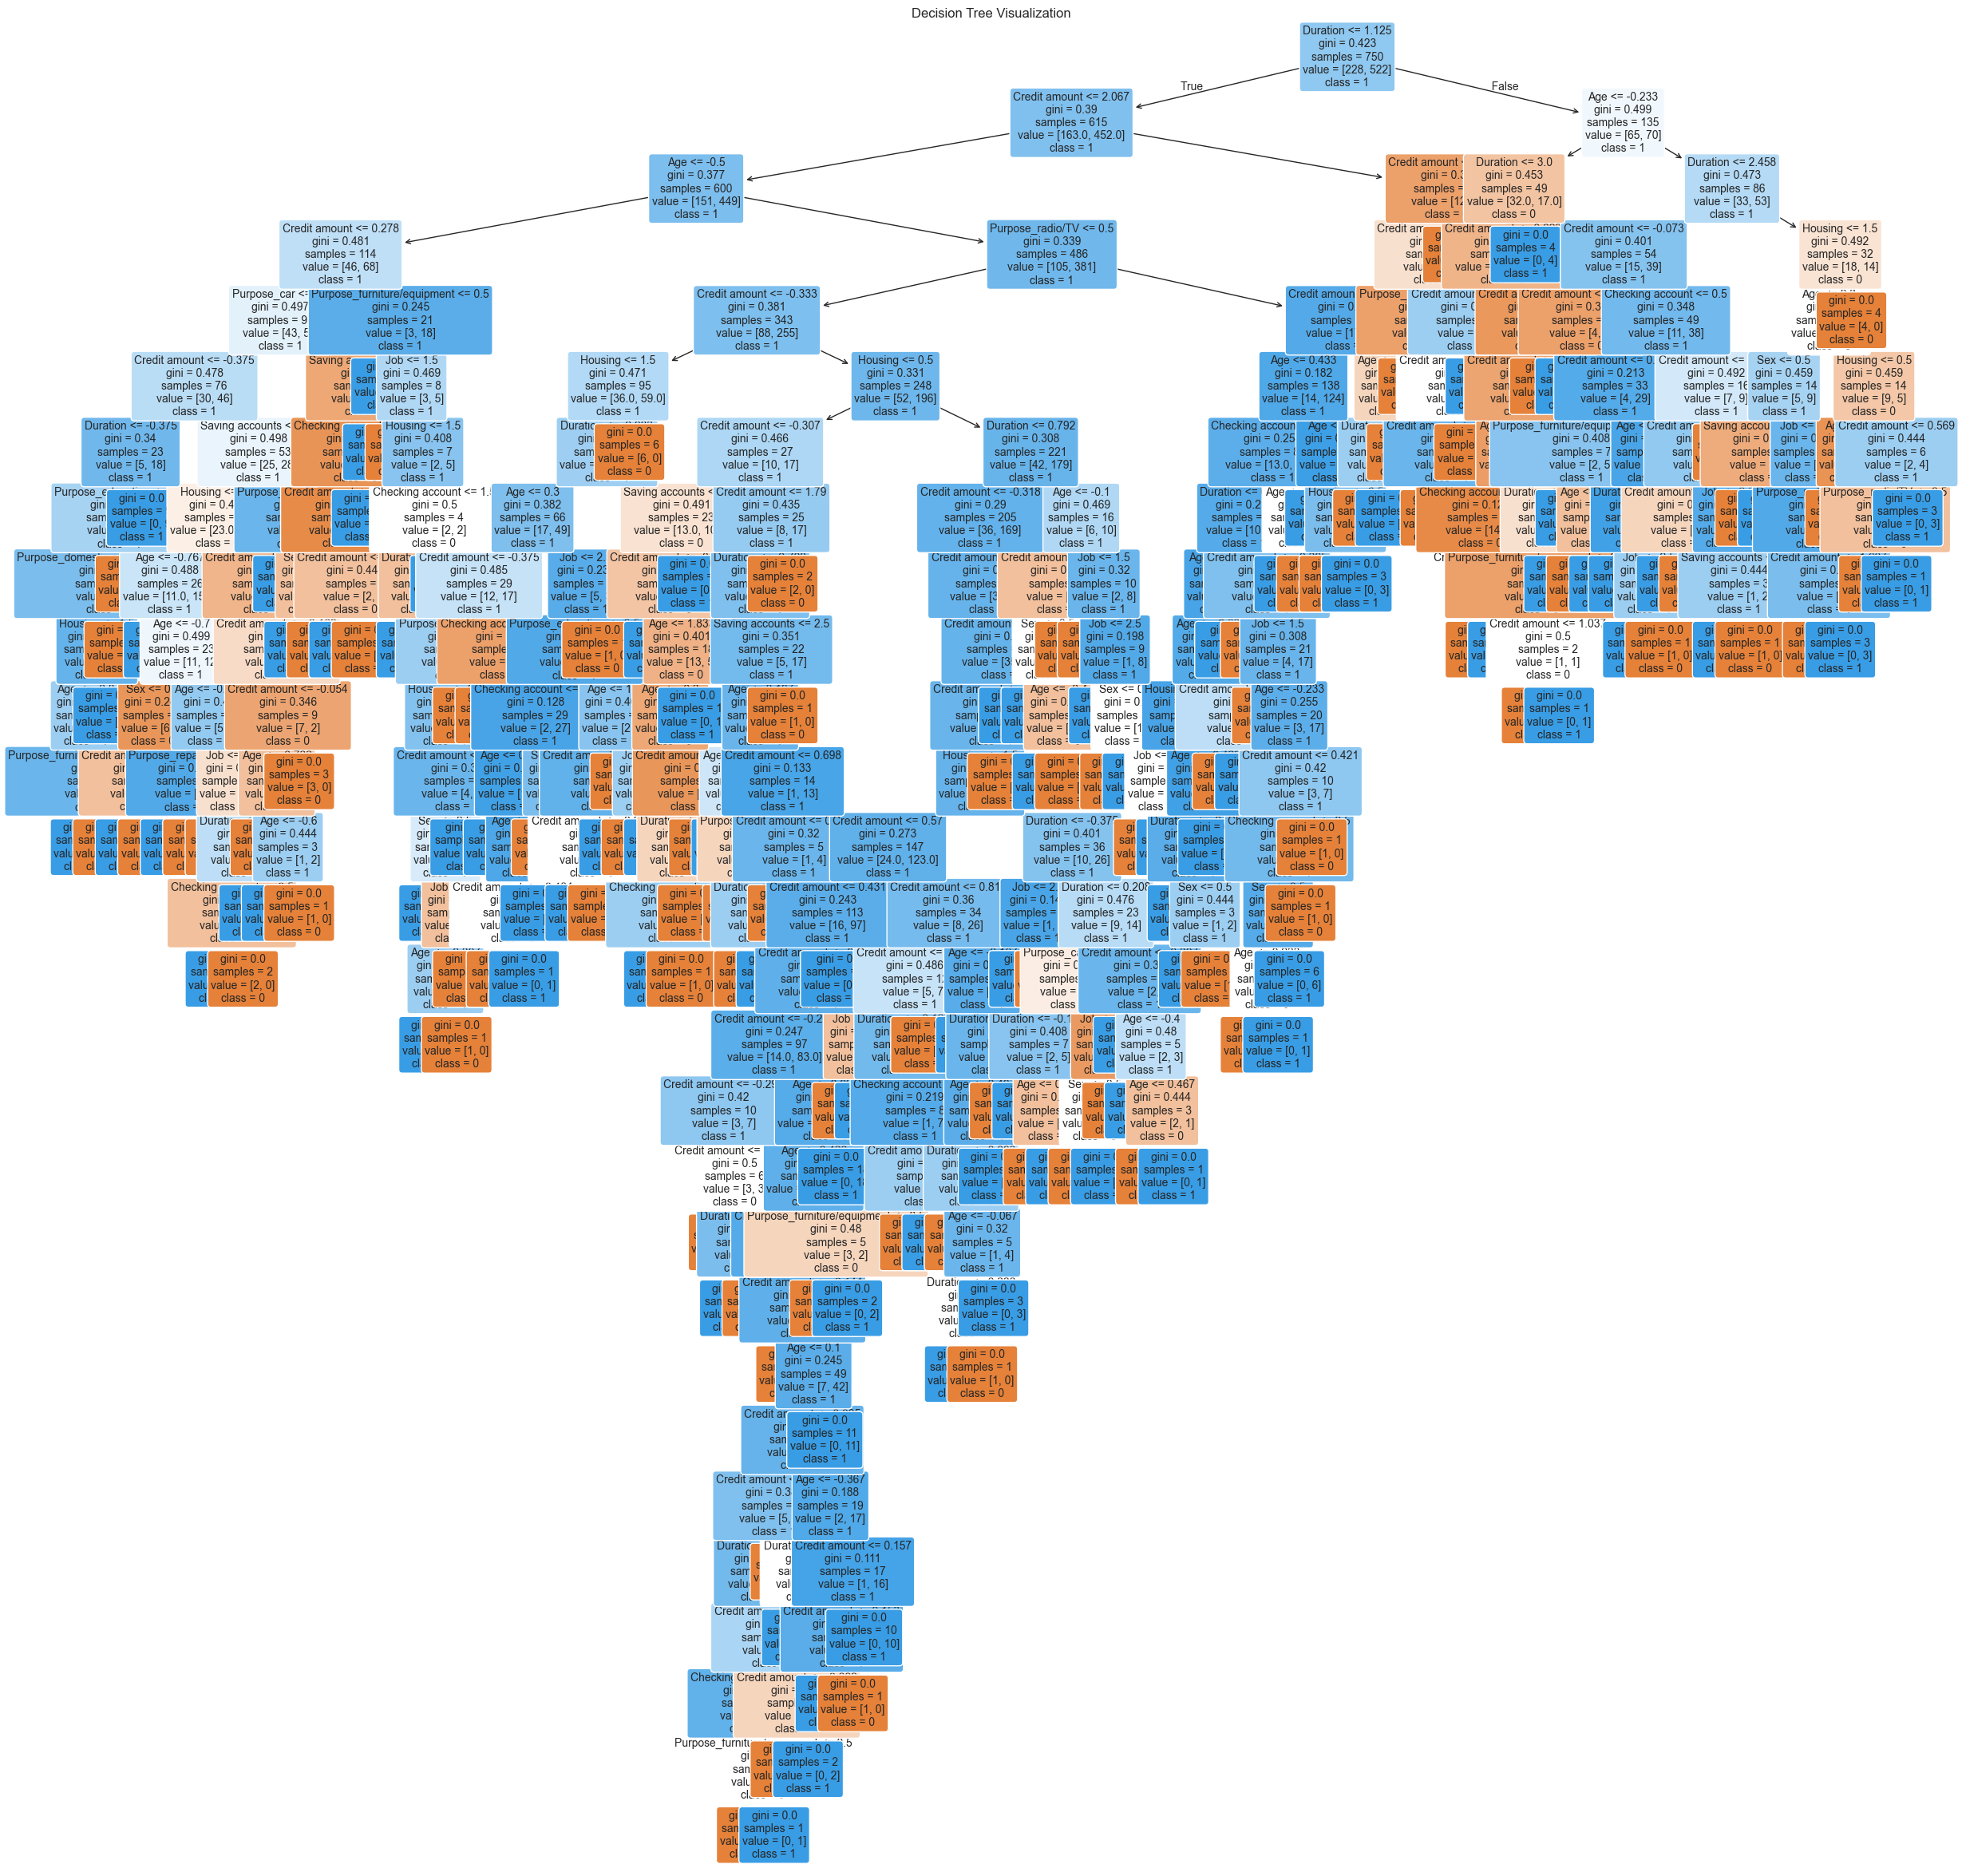

In [199]:
# Convert class names to strings
class_names = [str(cls) for cls in np.unique(y)]

plt.figure(figsize=(30, 30))
plot_tree(
    tree,
    filled=True,
    feature_names=X.columns,
    class_names=class_names,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

### Saving Model for Testing 

In [200]:
import pickle # Library used to save models
with open ("tree_model_pickle.pkl", "wb") as f: # open a new file with name and in writing mode.  
    pickle.dump(tree,f) # saving a model to a file as f  

In [201]:
# with open ("tree_model_pickle","rb") as f: CODE FOR Loadding model again into a notebook 
#     DT = pickle.load(f)

# Pre Pruning Decision Tree (Accuracy Based)

In This portion, we are playing with the parameters of decision tree classifer which are called hyperparameters used for finding the best accuracy of my model. For playing with parameters, we have to use GridSearchCV() method in which we apply cross validation on test and validation datasets.

In [202]:
# Defining Parameters of DT into a key-value pair for pre-pruning
# parameters = {
#     "criterion":['gini','entropy','log_loss'],
#     "splitter":['best','random'],
#     "max_depth":[1,2,3,4,5,6,7,8],
#     "max_features":['sqrt','log2'],
# }

parameters = {
    "criterion": ['gini', 'entropy', 'log_loss'],           # Split quality
    "splitter": ['best', 'random'],                         # How to choose split
    "max_depth": [3, 5, 7],                                 # Tree depth
    "min_samples_split": [2, 3, 5],                                # Minimum samples to split an internal node
    "min_samples_leaf": [1, 2, 4, 6 , 3],                       # Minimum samples at a leaf node
    "max_features": [None, 'sqrt', 'log2`'],                 # Number of features to consider at split
}

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree2 = DecisionTreeClassifier()
CV = GridSearchCV(tree2 , param_grid =parameters, cv =3 ,scoring ='accuracy',n_jobs=-1) 

### Model Training 

In [204]:
CV.fit(X_train,y_train) # testing best parameters by doing cross validation 

C:\Users\HACKER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
382 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HACKER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HACKER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2`'],
                         'min_samples_leaf': [1, 2, 4, 6, 3],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [205]:
CV.best_params_ # These are the best parameters 

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'random'}

In [206]:
y_pred2 = CV.predict(X_test) 

# Model Evaluation

In [207]:
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.14      0.22        72
           1       0.73      0.96      0.83       178

    accuracy                           0.72       250
   macro avg       0.64      0.55      0.53       250
weighted avg       0.68      0.72      0.65       250

Confusion Matrix:
 [[ 10  62]
 [  8 170]]


# Pre Pruning Decision Tree (F1.score Based)

In [208]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree3 = DecisionTreeClassifier()
CV2 = GridSearchCV(tree3 , param_grid =parameters, cv =5 ,scoring ='f1_macro',n_jobs=-1) 

### Model Training 

In [209]:
CV2.fit(X_train,y_train) # testing best parameters by doing cross validation 

C:\Users\HACKER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1350 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
664 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HACKER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HACKER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  Fil

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2`'],
                         'min_samples_leaf': [1, 2, 4, 6, 3],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']},
             scoring='f1_macro')

In [210]:
CV2.best_params_ # These are the best parameters 

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'best'}

In [211]:
y_pred3 = CV2.predict(X_test) 

# Model Evaluation

In [212]:
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("\nClassification Report:\n", classification_report(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))

Accuracy: 0.676

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.19      0.26        72
           1       0.73      0.87      0.79       178

    accuracy                           0.68       250
   macro avg       0.55      0.53      0.52       250
weighted avg       0.63      0.68      0.64       250

Confusion Matrix:
 [[ 14  58]
 [ 23 155]]


# ROC (for models comparsion)

In [213]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC
fpr1, tpr1, _ = roc_curve(y_test, y_pred) # Mdoel # 1
fpr2, tpr2, _ = roc_curve(y_test, y_pred2) # Model # 2
fpr3, tpr3, _ = roc_curve(y_test, y_pred3) # Model # 3

# Calculate AUC
auc1 = roc_auc_score(y_test, y_pred)
auc2 = roc_auc_score(y_test, y_pred2)
auc3 = roc_auc_score(y_test, y_pred3)

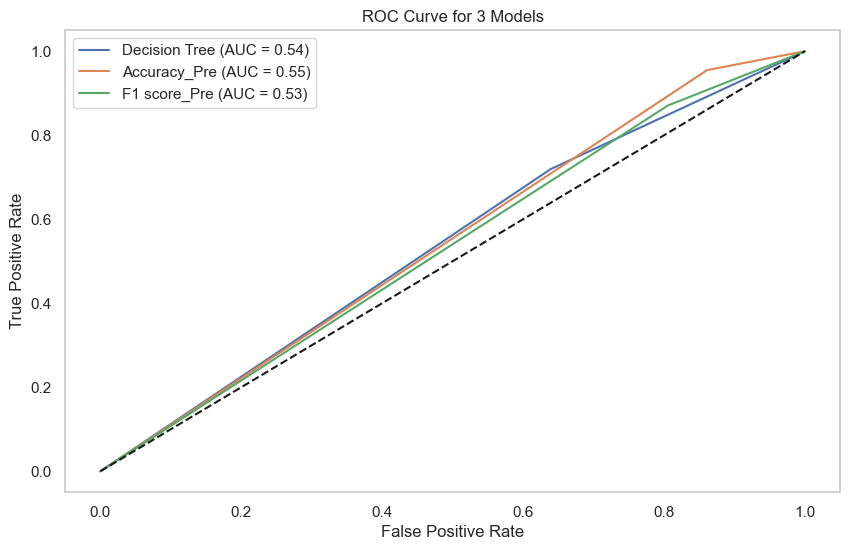

In [214]:
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, label=f'Decision Tree (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Accuracy_Pre (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'F1 score_Pre (AUC = {auc3:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 3 Models')
plt.legend()
plt.grid()
plt.show()

# Conclusion

**The AUC of Decicion Tree Accuracy Based Model is greater so we can say that it is more reliable model!**   

--------------------------

## Saving Models 

In [216]:
import pickle # Library used to save models
with open ("tree_f1_based.pkl", "wb") as f: # open a new file with name and in writing mode.  
    pickle.dump(CV2,f) # saving a model to a file as f  

In [217]:
import pickle # Library used to save models
with open ("tree_Accuracy_based.pkl", "wb") as f: # open a new file with name and in writing mode.  
    pickle.dump(CV,f) # saving a model to a file as f  